# Fase 2: Análisis exploratorio de datos

El objetivo de esta etapa es entender, visualizar y extraer información relevante del set de datos para decidir cuales son las tranformaciones necesarias que lo preparen para la fase de preprocesamiento.

Se han llevado a cabo las siguientes tareas:
- Análisis univariado de cada variable independiente y el vector objetivo
- Análisis bivariado de la relación entre cada variable independiente y el vector objetivo
- Análisis multivariado entre pares de variables y el vector objetivo o entre pares de variables y otras variables independientes
- Transformaciones a partir del análisis de variables:
    - Eliminación de registros con precios superiores a los 35.000 euros
    - Eliminación de registros con años inferiores a 1995
    - Eliminación de registros con potencias superiores a 250 PS
    - Transfomración en dato perdido de aquellas cilindradas superiores a 4.0 que se constataron como errores.
    - Unificación de categorías de gas y eléctrico/híbrido para la variable `fuelType`
    - Eliminación en la variable `brand` de los registros pertenecientes a marcas de superdeportivos, con escasos registros o catalogados como otros
    - Eliminación de la variable `model`
    - Eliminacion de la columna `cubic_centimeters` por excesiva correlación
    
    
- Eliminacion de la columna `name`
- Exportación del dataset resultante

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ancillary_funcs as aux
from ancillary_data import diccionario_marcas_modelos

import warnings
warnings.simplefilter('ignore')

In [2]:
# Definición del tipo, tamaño y resolución de los gráficos
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10,6) #12,8
plt.rcParams["figure.dpi"] = 70
plt.rcParams['axes.titlesize'] = 20

## El dataset después de la limpieza de datos
El dataset resultante de la limpieza de datos tiene unas dimensiones de 371528 filas y 13 columnas.

- `name`: Nombre del coche. Incluye detalles que pueden ser de interés como la mecánica del motor (TDI, DCi, CDI, etc) o la cilindrada (1.0, 1.6, etc.) (texto)
- `price`: Precio del coche. Es el vector objetivo. (numérica)
- `vehicleType`: tipo de vehículo (categórica: limousine/sedán, kleinwagen/coche pequeño, kombi/familiar, bus/monovolumenes y furgones, cabrio/convertible, coupe, suv, andere/otro)
- `yearOfRegistration`: año en que se registró el automóvil. (numérica)
- `gearbox`: Tipo de caja de cambios (categórica: manuell/manual o automatik/automática)
- `powerPS`: Potencia del coche en PS (numérica)
- `model`: Modelo del coche (categórica)
- `kilometer`: Kilómetros que ha recorrido el coche (numérica)
- `fuelType`: Tipo de combustible (categórica: benzin/gasolina, diesel/diésel, lpg/glp, cng/gnp, hybrid/híbrido, andere/otro, elektro/electrico)
- `brand`: Marca del coche (categórica)
- `notRepairedDamage`: si el automóvil tiene o no algún daño que no haya sido reparado (categórica: nein/no o ja/si)
- `postalZone`: Zona postal del coche (categórica)
- `cubic_centimeters`: capacidad del motor en litros (numérica)


In [3]:
df_original = pd.read_csv('df_stage_1.csv')

In [4]:
df_original.shape

(305762, 13)

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305762 entries, 0 to 305761
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                305762 non-null  object 
 1   price               305762 non-null  int64  
 2   vehicleType         294909 non-null  object 
 3   yearOfRegistration  305762 non-null  int64  
 4   gearbox             300411 non-null  object 
 5   powerPS             305762 non-null  int64  
 6   model               305762 non-null  object 
 7   kilometer           305762 non-null  int64  
 8   fuelType            290300 non-null  object 
 9   brand               305762 non-null  object 
 10  notRepairedDamage   263275 non-null  object 
 11  cubic_centimeters   124481 non-null  float64
 12  postalZone          305762 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 30.3+ MB


In [6]:
df = df_original.copy()

In [7]:
# Transformamos el tipo de dato para la variable 'postalZone'
df['postalZone'] = df['postalZone'].astype('object')

## Análisis univariado y bivariado de las variables
En este punto analizamos cada variable desde una perspectiva univariada (conteo en el caso de las variables categóricas y distribución para las numéricas) y bivariada (relación entre cada variable y el vector objetivo)

### Vector objetivo: 'price' (precio)

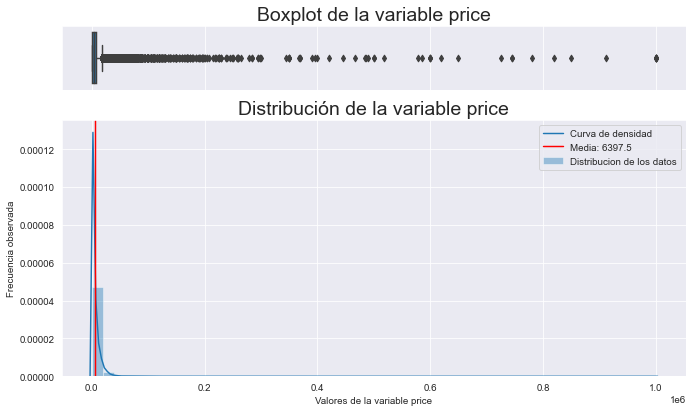

In [8]:
aux.hist_and_box(df, 'price')

- La mayor parte de autos del dataset se concentra en valores relativamente bajos, ligeramente por debajo de la media que se sitúa en 6397 euros.
- Existe un fuerte sesgo a la derecha, correspondiente a valores altos. Esto puede traer problemas a la hora de entrenar modelos predictivos, especialmente los lineales.
- Existen varios outliers en precios elevados que, independientemente de que quizás no nos interese incluir en el estudio datos de autos tan exclusivos, podrían tratarse de errores. Esto provoca la elevada desviación estándar de la variable y las grandes diferencias entre mediana y moda.

**Transformaciones**
- Eliminamos observaciones con un precio superior a 35.000 euros
- Esto se debe a la necesidad de excluir del estudio a vehículos de precios más elevados que escapan a los objetivos del estudio y además nos permite suavizar la asimetría de la distribución


In [9]:
# Eliminar filas con "price" > limsup
before_drop = df.shape[0]
df = df[(df['price'] < 35000)]
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 3730


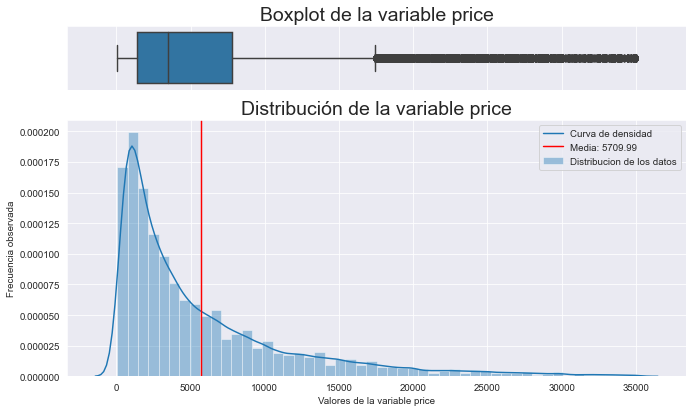

In [10]:
aux.hist_and_box(df, 'price')

- La distribución sigue teniendo un pronunciado sesgo hacia la derecha.
- La media de los precios disminuyó como consecuencia de la eliminación de los más elevados y se acercó a la mediana. 

### Variable 'yearOfRegistration' (año de registro)

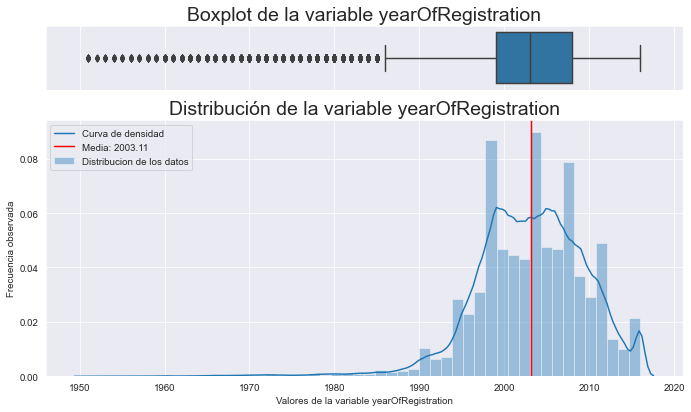

In [11]:
aux.hist_and_box(df, 'yearOfRegistration')

- La distribución de esta variable tiende hacia la normalidad. La mayoría de las observaciones se situan cercanas a la media que es 2002.
- Existe una prolongada cúspideque abarca desde 1998 hasta 2005 aproximadamente.
- Hay asimetría hacia la izquierda debido a la presencia, escasa, de autos anteriores a 1990.
- Existe una pequeña cuspide que denota un repunte de la presencia de vehículos para el año 2016

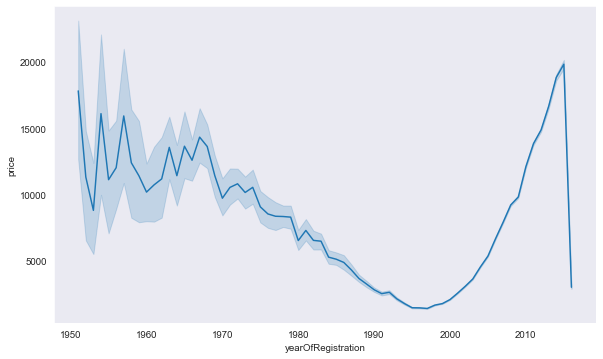

In [12]:
sns.lineplot(x='yearOfRegistration', y='price', data=df)
plt.grid()

Se puede observar varios patrones en este gráfico:
- Los precios promedio de los autos tienden a ser más elevados en los años anteriores a 1970, probablemente porque se trate de autos que ya se pueden considerar históricos.
- Los precios tienen a bajar después de 1970 hasta 1995 y ahí se estabilizan ligeramente. Probablemente se trate de una mezcla de autos históricos con autos comunes con bastante uso.
- Para los autos de después del año 2000 hay una clara tendencia al alza en los precios que llega hasta 2015
- La caída de precios en promedio para el año 2016 puede deberse al hecho de que muchos usuarios de páginas de segunda mano colocan valores cercanos a 0 para negociar directamente el precio con el posible comprador.

**Transformaciones**
- Eliminación de las observaciones cuyo año de registro es anterior a 1995.
    - Por un lado estos se sitúan más allá del tercer cuartil con lo que se trataría de outliers (desde 1988 aproximadamente). 
    - Por otro lado, no nos interesan modelos cuyo precio sea más elevado por que se consideren históricos.
- Eliminación de las obervaciones cuyo año es 2016
    - No nos interesa tampoco que las observaciones del año 2016 estén asociadas en promedio con precios más bajos.

In [13]:
# Eliminar filas con "yearOfRegistration" > 1995
before_drop = df.shape[0]
df = df[(df['yearOfRegistration'] >= 1995)]
df = df[(df['yearOfRegistration'] < 2016)]
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 26971


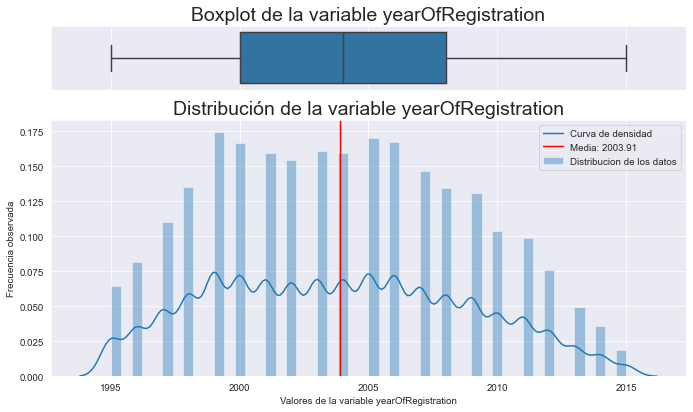

In [14]:
aux.hist_and_box(df, 'yearOfRegistration')

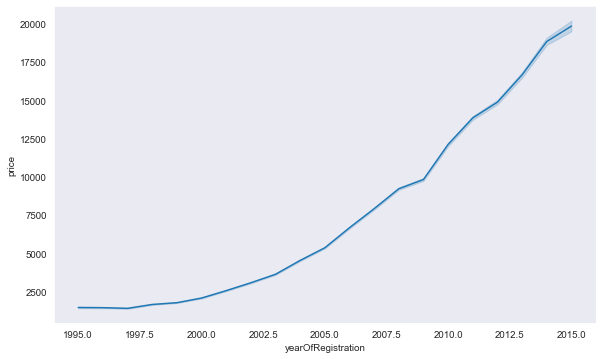

In [15]:
sns.lineplot(x='yearOfRegistration', y='price', data=df)
plt.grid()

- Después de las transformaciones se acabó con el sesgo de la variable y los outliers
- Ahora observamos una correlación positiva donde, en líneas generales, años más cercanos al presente suponen un mayor precio del auto.

### Variable 'powerPS' (caballos de potencia)

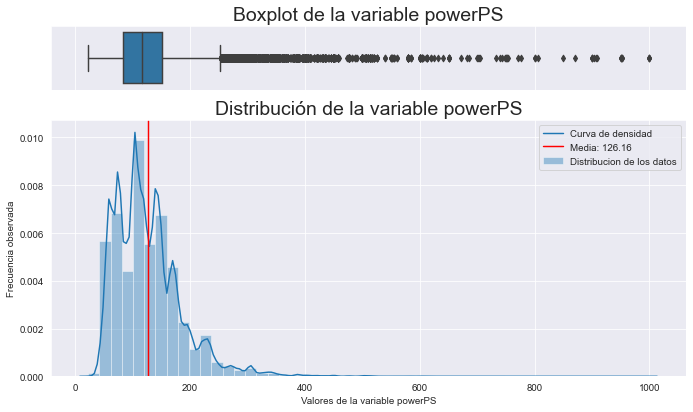

In [16]:
aux.hist_and_box(df, 'powerPS')

- La distribución de esta variable presesnta un fuerte sesgo hacia la derecha (valores altos) debido a los outliers que suponen los autos de altas prestaciones, los superdeportivos y, posiblemente, algunos errores.
- La mayor concentración de datos se sitúa por debajo de la media, que es de 120 caballos.

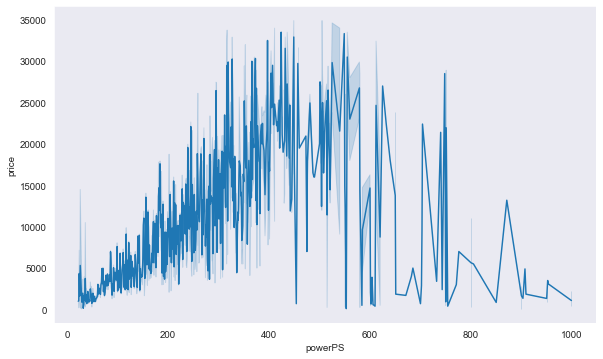

In [17]:
sns.lineplot(x='powerPS', y='price', data=df)
plt.grid()

- Se observan una correlación positiva entre el precio del auto y los caballos de potencia.
- A partir de los 400 caballos el gráfico se torna más confuso e irregular probablemente debido a que se trata de valores atípicos con cifras muy dispares entre sí
- La oscilación en el gráfico podría significar que, si bien mayor potencia se asocia a un mayor precio, otras variables en juego pueden estar haciendo fluctuar al gráfico.

**Transformaciones**
- Eliminación de las observaciones cuyos caballos son superiores a 300 unidades

In [18]:
# Obtenemos el rango intercuartil
iqr = np.percentile(df['powerPS'],75) - np.percentile(df['powerPS'],25)

# Calculamos el tercer cuartil
q3 = np.percentile(df['powerPS'],75)

# Calculamos el limite superior
limsup = round(q3+1.5*iqr,0)
print(f'Eliminaremos los registros con una potencia superior a {limsup}')

Eliminaremos los registros con una potencia superior a 252.0


In [19]:
# Eliminar filas con "powerPS" > 255
before_drop = df.shape[0]
df = df[(df['powerPS'] < limsup)]
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 8846


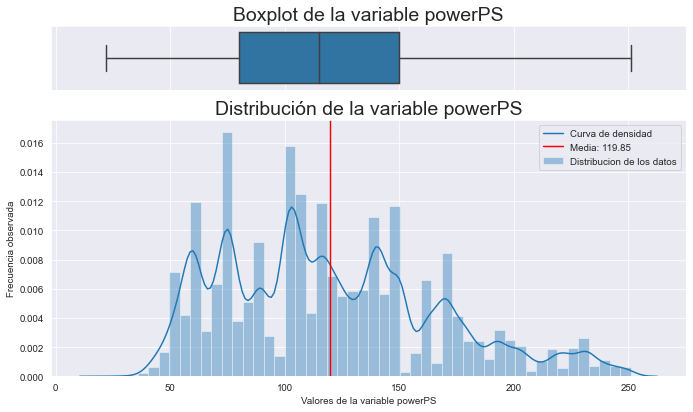

In [20]:
aux.hist_and_box(df, 'powerPS')

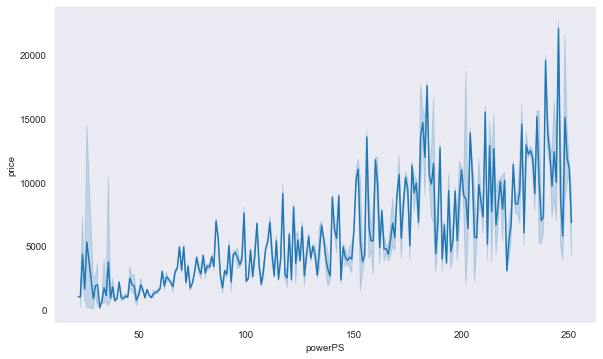

In [21]:
sns.lineplot(x='powerPS', y='price', data=df)
plt.grid()

- Después de las transformaciones se redujo el sesgo de la variable y los outliers
- Mejoró su tendencia a la normalidad

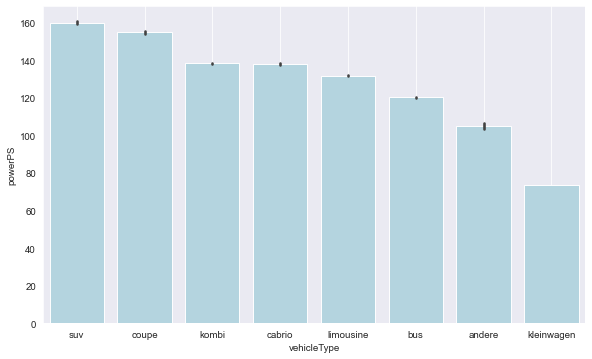

In [22]:
aux.barplot_bivariado(df, 'powerPS', 'vehicleType', orient='vertical')

- Vemos como el tipo de vehículo también va asociado con distintos niveles de potencia estando en primer lugar los SUV y deportivos y en último lugar los compactos y furgones/monovolumenes

### Variable 'kilometer' (kilómetros recorridos)

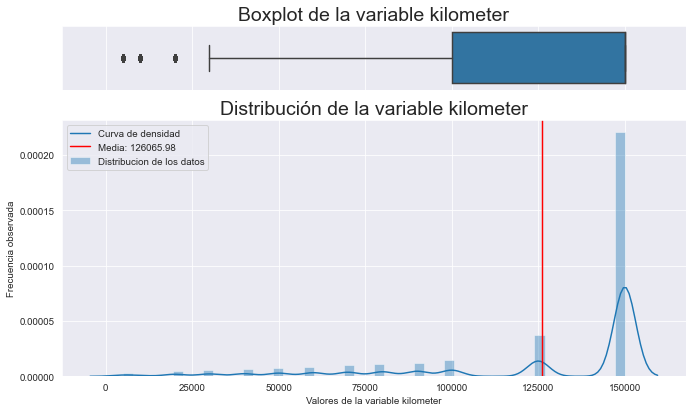

In [23]:
aux.hist_and_box(df, 'kilometer')

- Se observa una distribución irregular de las observaciones
- Existe una larga cola hacia la izquierda que pertenece a los kilometrajes más reducidos.
- La media se sitúa en torno a los 125.000 kilómetros pero la gran mayoría de registros tienen 150.000
- El hecho de que la variable no se comporte de una manera más tendente a la normalidad o de que el valor máximo y el más repetido sea el de 150.000 kilómetros conduce a sospechar que esta variable sea errónea. Son relativamente muy pocos kilómetros para tratarse de más de 300.000 registros de autos usados. 
    - Si esta fuera nuestra interpretación tendríamos que eliminarla, a pesar de ser; a priori, una de las variables fundamentales a la hora de establecer el precio de un auto usado.
    - Otra posible interpretación sería que la plataforma de la que proceden los datos estableció un limite de kilómetros a la hora de cargar un auto para su venta.

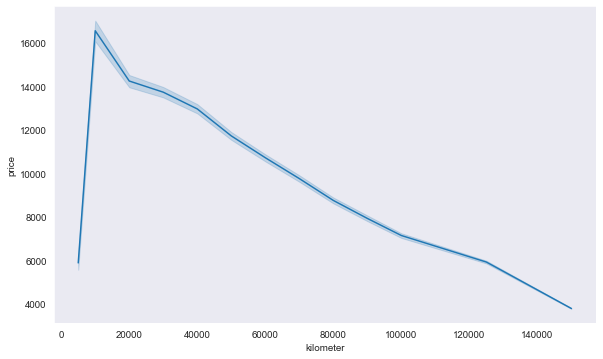

In [24]:
sns.lineplot(x='kilometer', y='price', data=df)
plt.grid()

- Observamos una relación lineal negativa entre el precio y los kilómetros recorridos por el auto.

- Esta debe ser una buena variable predictiva aunque debemos considerar también los problemas observados con ella (su mediana y valor máximo coinciden, pocos valores diferentes, etc.)

- A pesar de dichos problemas, pensamos que lo importante es que esta variable actúa como podría esperarse de ella, es decir, penaliza el precio del auto cuanto mayor es el número de kilómetros aunque, quizás, de forma escesiva. Por este motivo la vamos a conservar.

**Transformaciones**
- Eliminación de los kilómetros inferiores a 45000 porque están relacionados con precios más bajos, lo cual no nos interesa.

In [25]:
# Eliminar filas con "kilometer" > 250
before_drop = df.shape[0]
df = df[(df['kilometer'] > 45000)]
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 16554


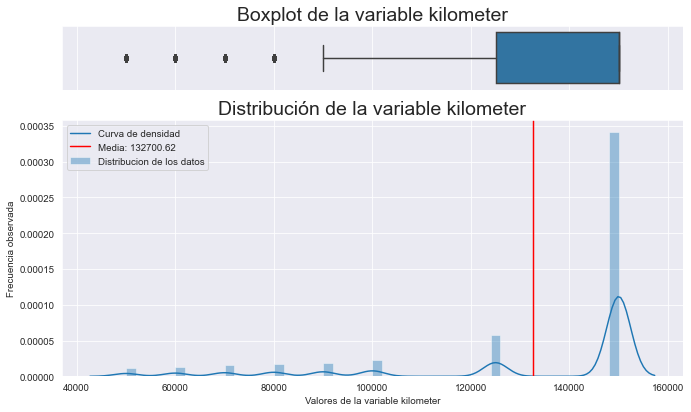

In [26]:
aux.hist_and_box(df, 'kilometer')

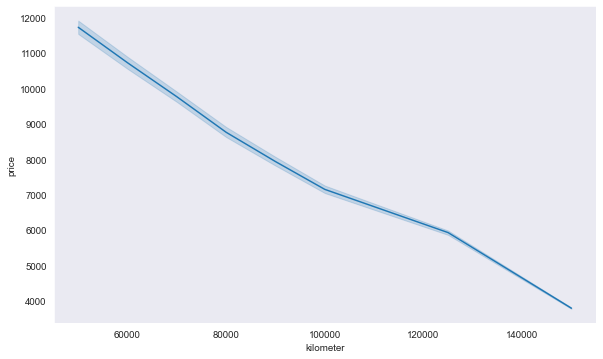

In [27]:
sns.lineplot(x='kilometer', y='price', data=df)
plt.grid()

### Variable 'cubic_centimeters' (capacidad del motor)

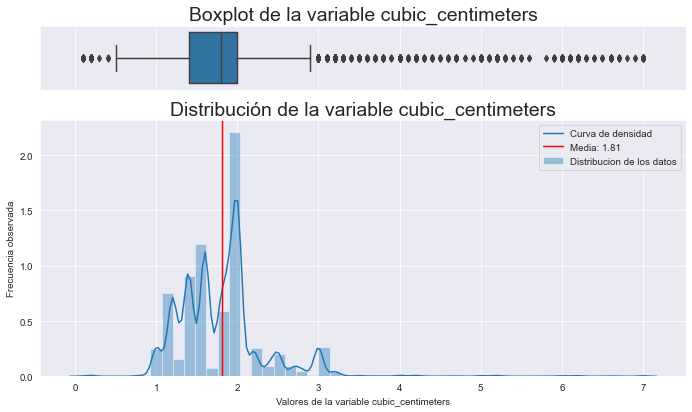

In [28]:
aux.hist_and_box(df, 'cubic_centimeters')

- La variable presenta una distribución ligeramente irregular de los datos pero que se acerca a la normalidad
- La media y la mediana se sitúan en valores muy cercanos: 1.83 y 1.8 respectivamente
- Las mayores frecuencias están por debajo de la media y por encima entorno a los 2.0. Mas allá de eso disminuyen, seguramente porque pertenecen a autos más exclusivos y por lo tanto menos frecuentes.

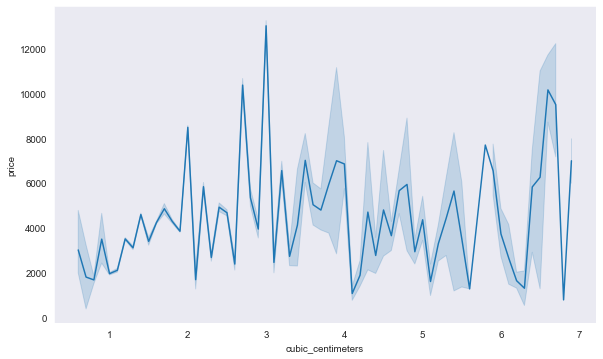

In [29]:
sns.lineplot(x='cubic_centimeters', y='price', data=df[(df['cubic_centimeters']<7) & (df['cubic_centimeters']>0.5)])
plt.grid()

- Se observa una relación positiva entre el precio y los centímetros cúbicos

- Podría tratarse de buena variable predictora.
- Igual que ocurria con los caballos de potencia tenemos un gráfico de forma errática que puede indicar la influencia de más variables o la presencia de anomalías

**Transformaciones**
- Se constataron errores como consecuencia de la extracción de los datos procedentes de la variable 'name'. Para mitigar este problema se han transformado en dato perdido aquellas observaciones con una capacidad de más de 4.0 pertenecientes a las marcas que no cuentan con modelos que las porten.

In [30]:
# Comprobamos la presencia de errores
df[(df['cubic_centimeters']>4)]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,cubic_centimeters,postalZone
31,abschleppwagen_vw_lt_195.000_gruene_plakette_t...,11900,andere,2002,manuell,129,andere,150000,diesel,volkswagen,nein,5.0,1
146,mercedes_benz_e320_cdi_/tuv_05.2017_//vollaust...,2390,kombi,2000,automatik,197,e_klasse,150000,diesel,mercedes_benz,nein,5.2,2
208,mitsubishi_colt_1300_gli_|_original_65.500_km_...,895,limousine,1995,manuell,75,colt,70000,benzin,mitsubishi,nein,5.5,5
313,fiat_punto_188_sx__97.000km__tuv__8_fach_berei...,1490,kleinwagen,2000,manuell,60,punto,100000,benzin,fiat,nein,7.0,5
508,peugeot_206cc_quiksilver_bj_2005_95.000_km,3800,cabrio,2005,manuell,109,2_reihe,100000,benzin,peugeot,NaN,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304807,opel_tigra_tuev_4.2017,280,limousine,1996,manuell,90,tigra,150000,benzin,opel,nein,4.2,4
304955,vw_golf_87.000km_hu/au_neu,2450,limousine,1998,NaN,75,golf,90000,benzin,volkswagen,NaN,7.0,2
305233,bmw_e39_klimaautomatik_m_sportfahrwerk_hu_6.16,2349,limousine,1997,manuell,150,5er,150000,benzin,bmw,nein,6.1,5
305576,renault_twingo_1_2_servo_tuv/au_04.2017,699,kleinwagen,1997,manuell,54,twingo,150000,benzin,renault,nein,4.2,4


In [31]:
# Almacenamos las marcas que contienen errores
cc_1 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='bmw',
                                               df['brand']=='mercedes_benz',
                                               df['brand']=='opel')
                                               ]
cc_2 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='fiat',
                                               df['brand']=='renault',
                                               df['brand']=='peugeot')
                                               ]
cc_3 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='seat',
                                               df['brand']=='nissan',
                                               df['brand']=='citroen')
                                               ]
cc_4 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='hyundai',
                                               df['brand']=='mitsubishi',
                                               df['brand']=='honda')
                                               ]
cc_5 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='toyota',
                                               df['brand']=='mazda',
                                               df['brand']=='smart')
                                               ]
cc_6 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='suzuki',
                                               df['brand']=='skoda ',
                                               df['brand']=='volvo')
                                               ]
cc_7 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='kia',
                                               df['brand']=='daihatsu',
                                               df['brand']=='mini')
                                               ]
cc_8 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='alfa_romeo',
                                               df['brand']=='dacia',
                                               df['brand']=='lancia')
                                               ]
cc_9 = df[(df['cubic_centimeters']>4) & np.logical_or(df['brand']=='daewoo',
                                               df['brand']=='trabant',
                                               df['brand']=='saab')
                                               ]
cc_10 = df[(df['cubic_centimeters']>4) & (df['brand']=='subaru')]

In [32]:
cc_concat = pd.concat([cc_1, cc_2, cc_3, cc_4, cc_5, cc_6, cc_7, cc_8, cc_9, cc_10], axis=0)

In [33]:
# Convertimos en np.nan las filas con 'cubic_centimeters' mayores a 4.0 pertenecientes a las marcas seleccionadas
before_trans = df['cubic_centimeters'].isna().sum()
for rowname, rowseries in cc_concat.iterrows():
    df.loc[rowname, 'cubic_centimeters'] = np.nan
after_trans = df['cubic_centimeters'].isna().sum()
print(f'Registros transformados: {after_trans - before_trans}')

Registros transformados: 335


### Variable 'vehicleType' (tipo de vehículo)

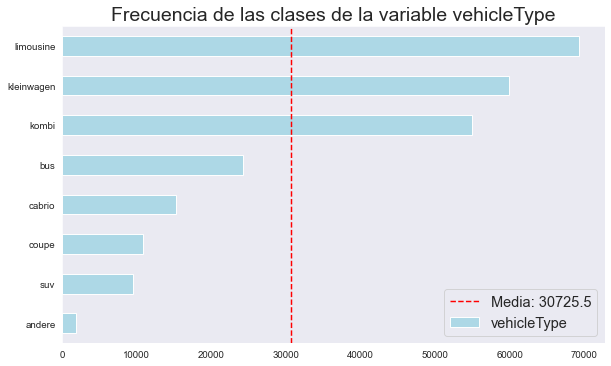

In [34]:
aux.barhplot(df, 'vehicleType')

Se observa un desbalance importante entre las clases que se podrían clasificar en dos grupos:

- Las clases con una representación mayor a la media son:
    - limousine (sedán)
    - kleinwagen (compacto)
    - kombi (familiar, llamado ranchera en España y station wagon en Chile)
    
    
- Por debajo de la media tenemos:
    - bus (agrupa monovolumenes y furgones)
    - cabrio (convertible)
    - coupe (deportivo)
    - suv (SUV y todoterreno)
    - andere (otros)
    
Cabe señalar que las clases de la variable tipo de vehiculo en realidad no son siempre excluyentes unas de otras y muchas veces nos vamos a encontrar con autos que podrían pertenecer a más de uno o dos tipos.

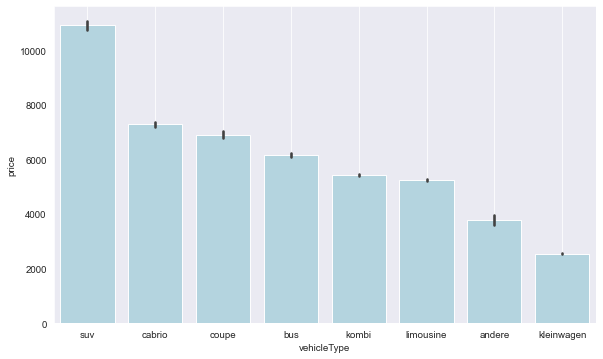

In [35]:
aux.barplot_bivariado(df, 'price', 'vehicleType', orient='vertical')

- Los tipos de auto SUV, convertible y deportivo se identifican con precios más elevados
- En el extremo inferior tenemos a los compactos
- En un término medio estarían los sedán, monovolumenes y familiares

### Variable 'gearbox' (caja de cambios)

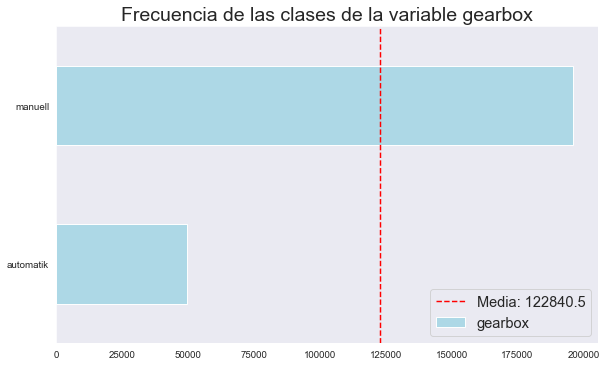

In [36]:
aux.barhplot(df, 'gearbox')

Aquí únicamente tenemos dos clases con un fuerte desbalance a favor de las cajas de cambio de tipo manual.

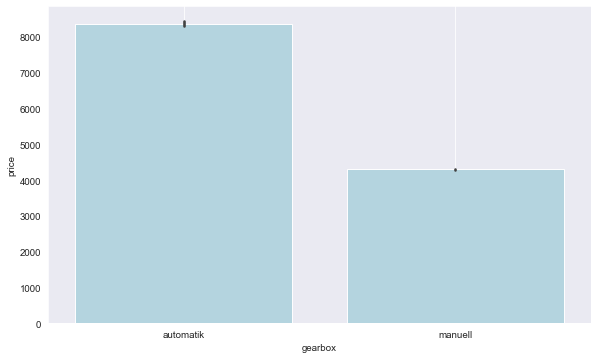

In [37]:
aux.barplot_bivariado(df, 'price', 'gearbox', orient='vertical')

- En promedio los autos con caja de cambios automática tienen un precio de más del doble que los autos manuales.
- Esta variable parece ser un buen predictor.

### Variable 'fuelType' (tipo de combustible)

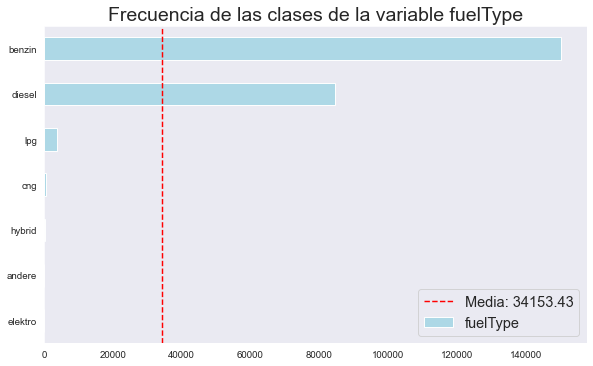

In [38]:
aux.barhplot(df, 'fuelType')

Se observa un desbalance importante entre las clases:

- Por encima de la media tenemos a los autos de gasolina (benzin), en primer lugar y con cerca del doble de observaciones de la segunda clase que es el diesel
- Por debajo de la media y con una representación débil tenemos la clase lpg (gas licuado de petróleo)
- Con un peso casi inexistente tenemos, por último, cng (gas natural comprimido), hybrid (híbrido), andere (otro) y elektro (eléctrico)

    
Llama la atención la escasa presencia de autos híbridos y eléctricos. Sin duda esto se debe a que la data pertenece al año 2016. De pertenecer los datos al año actual la situación sería completamente diferente. En el siguiente gráfico se puede observar como el boom de los autos híbridos y eléctricos se produjo claramente en 2020.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/PEV_Registrations_Germany_2010_2014.png/1024px-PEV_Registrations_Germany_2010_2014.png" width="500" align="left"/>
<div>
    
    
Registros anuales de carros eléctricos en Alemania por tipo de vehículo entre 2010 y 2021. Fuente: Wikipedia

**Transformaciones**

- Trataremos los registros 'andere' (otro) como valores perdidos los vamos a eliminar. Lo más probable es que pertenezcan a las categorías gasolina o diesel pero teniendo en cuenta su número y la cantidad de datos que tenemos no vemos necesaria su imputación.
- Las categorías gas licuado de petróleo y gas natural comprimido se pueden unificar en una sola.
- Las categorías híbrido y eléctrico se pueden unificar en una sola.

In [39]:
# Unificamos las categorías eléctrico e híbrido
before_trans = df[(df['fuelType'] == 'hybrid')|(df['fuelType'] == 'elektro')].shape[0]
for rowname, rowseries in df.loc[(df['fuelType'] == 'hybrid')|(df['fuelType'] == 'elektro')].iterrows():
    df.loc[rowname, 'fuelType'] = 'hybrid_electro'
after_trans = df[(df['fuelType'] == 'hybrid')|(df['fuelType'] == 'elektro')].shape[0]
print(f'Registros transformados: {before_trans - after_trans}')

Registros transformados: 170


In [40]:
# Unificamos las categorías cng y lpg
before_trans = df[(df['fuelType'] == 'cng')|(df['fuelType'] == 'lpg')].shape[0]
for rowname, rowseries in df.loc[(df['fuelType'] == 'cng')|(df['fuelType'] == 'lpg')].iterrows():
    df.loc[rowname, 'fuelType'] = 'gas'
after_trans = df[(df['fuelType'] == 'cng')|(df['fuelType'] == 'lpg')].shape[0]
print(f'Registros transformados: {before_trans - after_trans}')

Registros transformados: 4173


In [41]:
# Comprobamos la transformación
df['fuelType'].value_counts()

benzin            150171
diesel             84520
gas                 4173
hybrid_electro       170
andere                40
Name: fuelType, dtype: int64

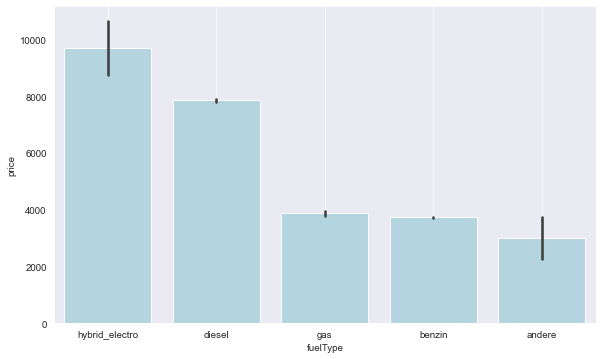

In [42]:
aux.barplot_bivariado(df, 'price', 'fuelType', orient='vertical')

- Los autos con combustible híbrido o eléctrico se asocian con precios más elevados
- Con los menores precios promedio tenemos la gasolina y el gas
- En un término medio están los autos de gasolina y gas. La diferencia promedio entre este grupo y el anterior es de algo más de doble
- Esta variable aparenta ser un buen predictor

### Variable 'notRepairedDamage' (daños sin reparar)

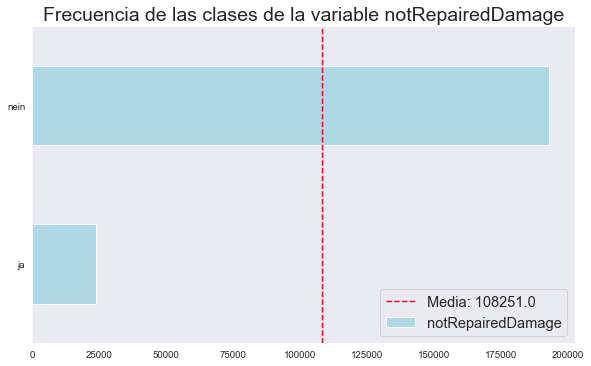

In [43]:
aux.barhplot(df, 'notRepairedDamage')

Tenemos dos clases fuertemente desbalanceadas:

- La mayoría de registros de los que se conoce si tienen o no algún daño sin reparar pertenecen a la clase del no (nein)

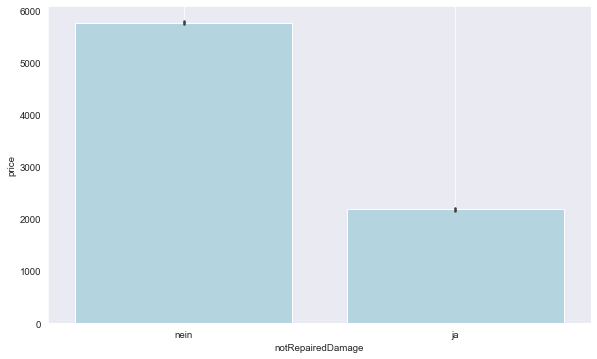

In [44]:
aux.barplot_bivariado(df, 'price', 'notRepairedDamage', orient='vertical')

- Como es evidente, los autos con daños sin reparar están asociados a un menor precio
- El problema con esta variable es que el abanico de daños que puede tener un auto es demasiado amplio
- Debemos considerar si nos interesa incluir en el estudio autos con daños sin reparar

### Variable 'postalZone' (zona postal)

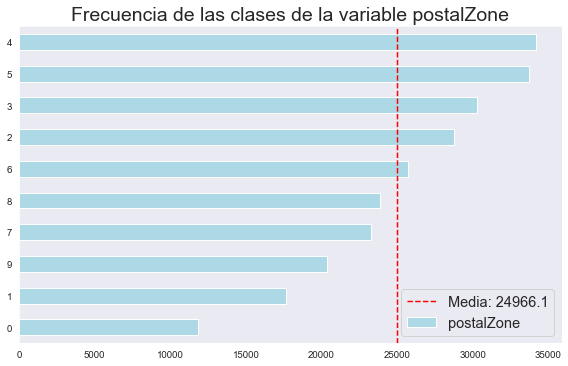

In [45]:
aux.barhplot(df, 'postalZone')

- Tenemos las 10 clases, una para cada zona postal en las que se divide Alemania. 
- Las 4 zonas con menos registros que la media están situadas de forma contigua en el este y sur del país
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/German_postcode_information.png/480px-German_postcode_information.png" width="300" align="left"/>
<div>
    

Mapa postal de Alemania. Fuente: Wikipedia

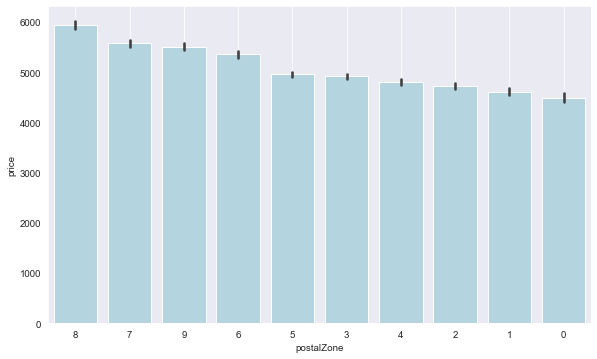

In [46]:
aux.barplot_bivariado(df, 'price', 'postalZone', orient='vertical')

- Con menor valor promedio tenémos las zonas postales 0, 1, 2, 3 y 4; situadas en el norte y centro del país.
- En el otro extremo tenemos las zonas postales 5, 6, 7, 8 y 9 correspondientes al sur del país.
- La variación entre la zona postal con menos precio promedio y la que tiene el mayor precio promedio es cerca de 1000 euros.
- A pesar de no tener relación directa con el precio del vehículo y que su variación no es tan grande como la de otros atributos puede ayudarnos a incluir en nuestros modelo predictivo información relacionada con la zona geográfica que puede afectar en el precio tal como la influencia de la demanda local, la economía regional o los costos asociados.

### Variable 'brand' (marca)

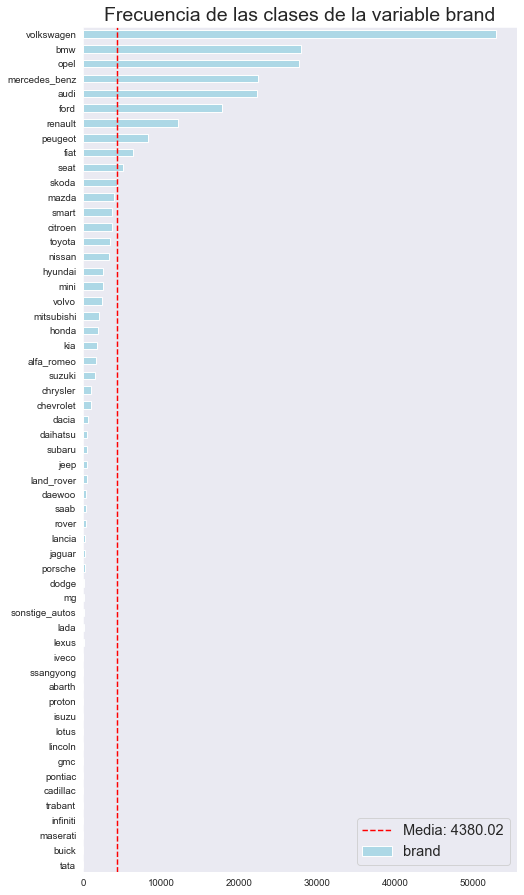

In [47]:
plt.figure(figsize=(8,16))
aux.barhplot(df, 'brand')

Tenemos un total de 73 marcas con una representación muy dispar
- En las primeras posiciones tenemos a los fabricantes alemanes Volswagen, BMW, Mercedes, Opel y Audi
- Seguidos por Ford, las francesas Renault y Peugeot, Fiat, Seat y Skoda.
- Cerca de la mitad de las marcas que aparecen en la data tienen una representación muy pobre
- Presencia de marcas de superdeportivos o autos de lujo que no nos interesan para nuestro análisis.

**Transformaciones**
- Eliminación de las marcas de superdeportivos o lujo
- Eliminación de marcas con escasos registros (menos de 10)
- Eliminación de los autos catalogados como otros ('sonstige_autos')

In [48]:
# Eliminamos marcas de superdeportivos, lujo y los de la categoria 'sonstige autos'
drop_brands = ['porsche', 'sonstige_autos', 'rolls_royce', 'proton', 'ferrari', 'maserati', 'caterham', 'buick', 'lotus']

before_drop = df.shape[0]

for brand in drop_brands:
    df = df.drop(df[(df['brand'] == brand)].index)
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 406


In [49]:
before_drop = df.shape[0]
for brand in df['brand'].unique():
    if df[df['brand'] == brand].shape[0] < 10:
        df = df.drop(df[(df['brand'] == brand)].index)
after_drop = df.shape[0]
print(f'Registros eliminados: {before_drop - after_drop}')

Registros eliminados: 40


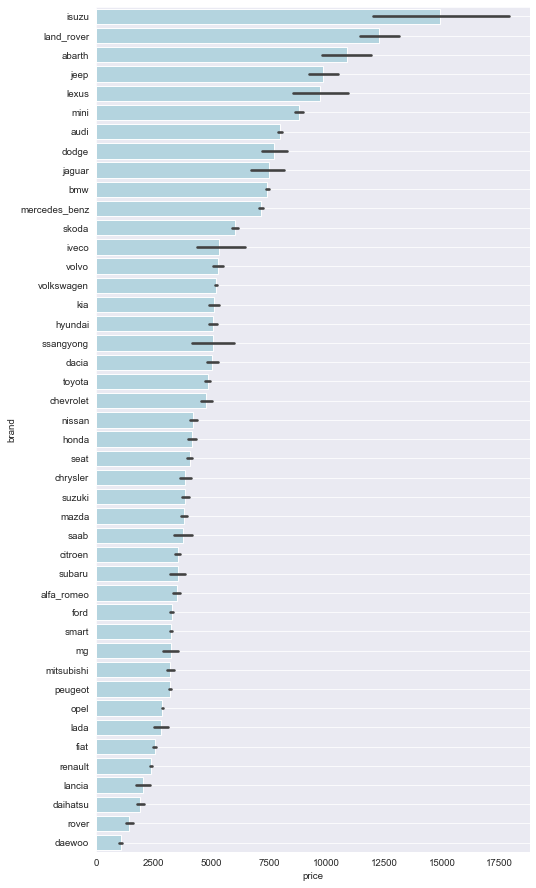

In [50]:
plt.figure(figsize=(8,16))
aux.barplot_bivariado(df, 'price', 'brand', orient='horizontal')

In [53]:
print('Marcas con los precio promedio más elevados')
df.groupby('brand')['price'].mean().to_frame().sort_values(by='price', ascending=False).head(5).style.format(precision=2)

Marcas con los precio promedio más elevados


,price
brand,
isuzu,14927.33
land_rover,12269.19
abarth,10883.32
jeep,9847.26
lexus,9712.76


In [54]:
print('Marcas con los precio promedio más bajos')
df.groupby('brand')['price'].mean().to_frame().sort_values(by='price', ascending=False).tail(5).style.format(precision=2)

Marcas con los precio promedio más bajos


,price
brand,
renault,2376.24
lancia,2030.06
daihatsu,1914.01
rover,1447.42
daewoo,1074.41


### Variable 'model' (modelo)

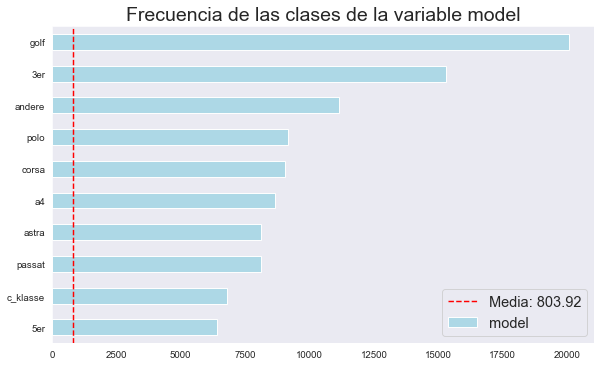

In [55]:
aux.barhplot(df, 'model', 10)

- Tenemos 373 clases diferentes por lo que solo mostramos en el gráfico a los 10 con más apariciones
- Cerca de 15.000 registros están catalogado como 'andere' (otro), lo cual sitúa esta categoría en segundo lugar
- En primer lugar tenemos Golf de Wolkswagen seguido por el mencionado 'andere', la serie 3 de BMW, Volkswagen Polo, Opel Corsa y Audi A4. 

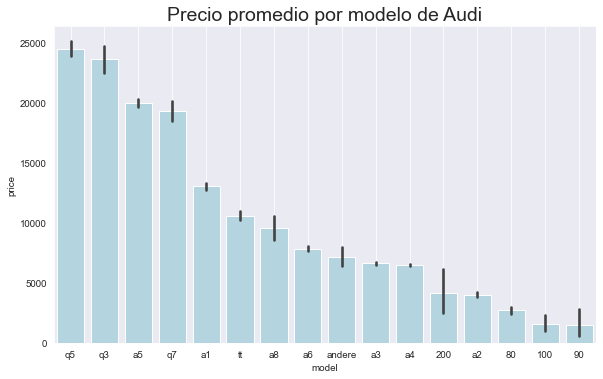

In [56]:
aux.barplot_bivariado(df[df['brand']=='audi'], 'price', 'model', orient='vertical')
plt.title('Precio promedio por modelo de Audi');

- Como se puede osbservar el modelo de auto es una característica que supone una gran variabilidad en el precio de un coche. 
- Esto la convierte en una buena variable predictora.

#### El problema de la dimensionalidad y los pasos a seguir

- El problema con la variable `model` es la enorme dimensionalidad a la que daría lugar su binarización (más de 300 columnas). 
- En general, el modelo de un vehículo condensa una serie de carácterísticas que vamos a analizar a continuación. 
- El objetivo es ver si esa variación que supone el modelo en el precio del vehículo puede ser representada por otras características que nos permitan prescindir de la variable `model`. Utilizaremos como ejemplo los modelos de la marca Audi 

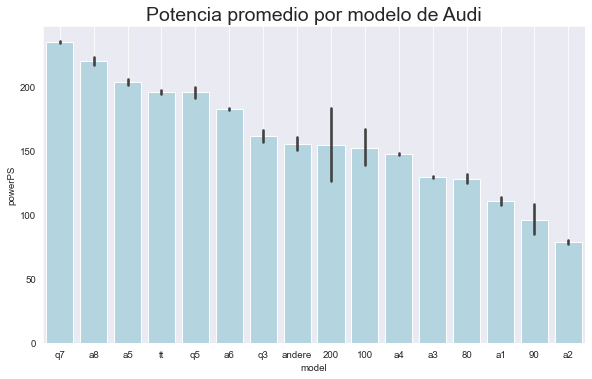

In [57]:
aux.barplot_bivariado(df[df['brand']=='audi'], 'powerPS', 'model', orient='vertical')
plt.title('Potencia promedio por modelo de Audi');

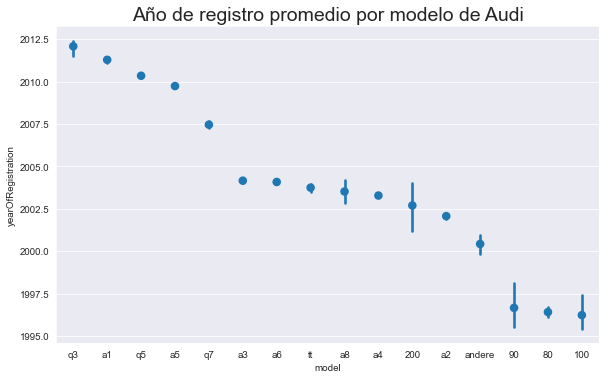

In [58]:
tmp_order_list = df[df['brand']== 'audi'].groupby('model')['yearOfRegistration'].mean().to_frame().sort_values(by='yearOfRegistration', ascending=False).index
sns.pointplot(data = df, y=df['yearOfRegistration'], x=df[df['brand']== 'audi']['model'], join=False, order=tmp_order_list)
plt.title('Año de registro promedio por modelo de Audi');


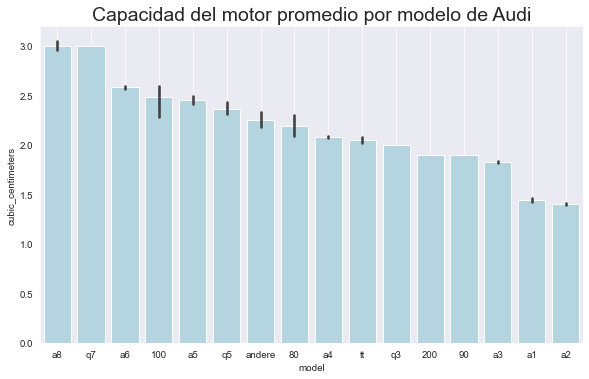

In [59]:
aux.barplot_bivariado(df[df['brand']=='audi'], 'cubic_centimeters', 'model', orient='vertical')
plt.title('Capacidad del motor promedio por modelo de Audi');

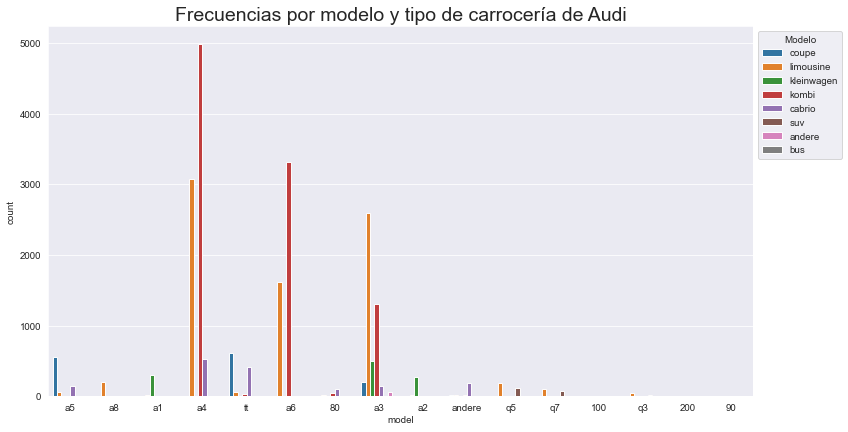

In [60]:
plt.figure(figsize=(13,7))
#sns.countplot(x='vehicleType', hue='model', data=df[df['brand']== 'audi'])
sns.countplot(x='model', hue='vehicleType', data=df[df['brand']== 'audi'])
#sns.countplot(x=df[df['brand']== 'audi']['model'], y=df['vehicleType'], ci=None)
plt.legend(title='Modelo', bbox_to_anchor=(1, 1))
plt.title('Frecuencias por modelo y tipo de carrocería de Audi');

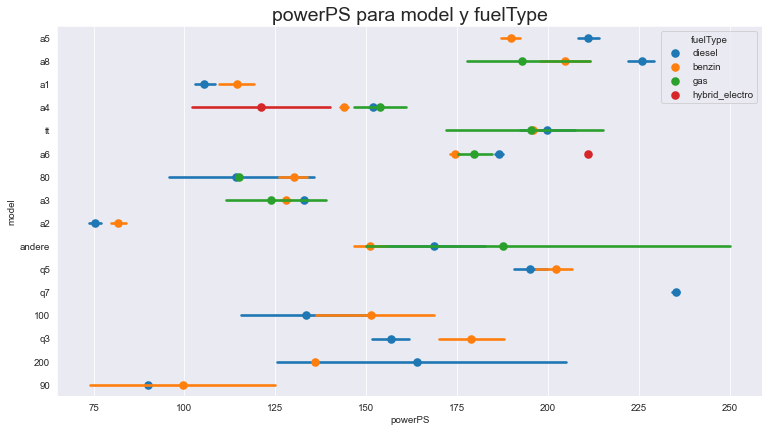

In [61]:
plt.figure(figsize=(13,7))
aux.pointplot_multivariado(df[df['brand']== 'audi'], 'powerPS', 'model', 'fuelType')

**Conclusiones y eliminación de la variable**
- Como se ha podido observar, el modelo de un coche está asociado a varios aspectos y caracteristicas del mismo
    - se asocia a una marca concreta
    - un rango de potencia
    - un rango de años de registro en los que el modelo se encuentra en producción
    - un rango de capacidad del motor
    - uno o varios tipos de carrocería
    - en varios casos la gasolina se asocia a una mayor potencia que el diesel
    - el precio.
- Por ejemplo, un Audi A6 estaría relacionado con una potencia promedio de unos 180 caballos, un año de registro en torno a 2004, una capacidad de motor cercana a 2.6 litros y las carrocerías tipo familiar y sedán

In [62]:
before_drop = df.shape[1]
df.drop(columns='model', inplace=True)
after_drop = df.shape[1]
print(f'Columnas eliminadas: {before_drop - after_drop}')

Columnas eliminadas: 1


In [63]:
# Verificamos los resultados
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,cubic_centimeters,postalZone
0,a5_sportback_2.7_tdi,18300,coupe,2011,manuell,190,125000,diesel,audi,ja,2.7,6
1,"jeep_grand_cherokee_""overland""",9800,suv,2004,automatik,163,125000,diesel,jeep,NaN,NaN,9
2,golf_4_1_4__3turer,1500,kleinwagen,2001,manuell,75,150000,benzin,volkswagen,nein,NaN,9
3,skoda_fabia_1.4_tdi_pd_classic,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,nein,1.4,6
4,bmw_316i___e36_limousine___bastlerfahrzeug__ex...,650,limousine,1995,manuell,102,150000,benzin,bmw,ja,NaN,3


## Análisis de correlación entre variables
- Vamos a identificar correlación entre todos los posibles pares de variables numéricas
- Conocer cuáles son las relaciones más relevantes con el vector objetivo
- Proponer variables candidatas a la eliminación por excesiva correlación

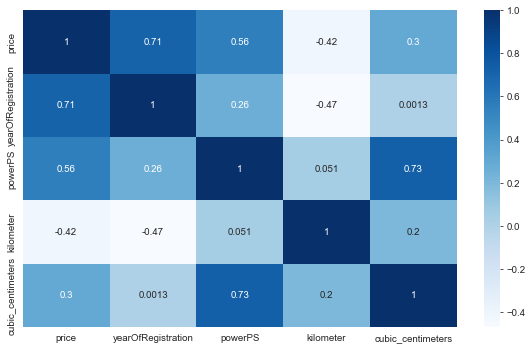

In [64]:
sns.heatmap(df.corr(), cmap='Blues', annot=True);

- Observamos una correlación superior a 0.7 entre dos variables independientes: 'powerPS' y 'cubic_centimeters'. Esto quiere decir que tenemos una asociación linear fuerte entre las dos y una nos está dando información sobre la otra, por lo tanto, podemos prescindir de una de ellas.
- El resto de correlaciones entre variables independientes se mantienen en niveles aceptables siendo la más elevada un -0.51 entre kilometer y yerOfRegistration
- Solo existen correlaciones relativamente fuertes entre variables independientes y el vector objetivo (powerPS y yerOfRegistration)

In [65]:
# Hacemos un conteo de valores perdidos para las dos variables más correlacionadas
print(f'Valores perdidos para la variable powerPS: {df["powerPS"].isna().sum()}')
print(f'Valores perdidos para la variable cubic_centimeters: {df["cubic_centimeters"].isna().sum()}')

Valores perdidos para la variable powerPS: 0
Valores perdidos para la variable cubic_centimeters: 140320


**Transformaciones**
- La elevada cifra de valores perdidos para la variable 'cubic_centimeters' nos hace decantarnos por su eliminación.

In [66]:
before_drop = df.shape[1]
df.drop(columns='cubic_centimeters', inplace=True)
after_drop = df.shape[1]
print(f'Columnas eliminadas: {before_drop - after_drop}')

Columnas eliminadas: 1


## Análisis multivariado
Establecemos relaciones de pares de variables independientes con el vector objetivo.

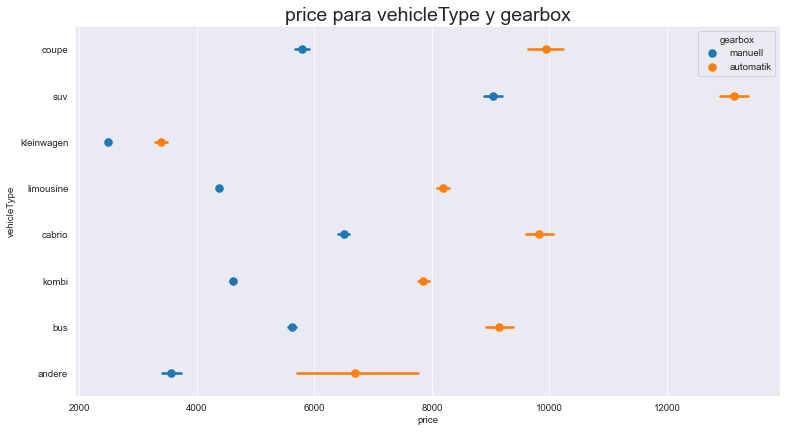

In [67]:
plt.figure(figsize=(13,7))
aux.pointplot_multivariado(df, 'price', 'vehicleType', 'gearbox')

- La variable 'gearbox' tiene un impacto importante en el precio de venta del auto para todos los tipos de vehículos.
- En relación al tipo de vehículo, para los compactos/kleinwagen, supone una variabilidad de más de 2.000 euros en el precio del vehículo siendo esta la menor de todas las diferencias. 
- Para las limusinas, que son el tipo de auto mayoritario en este estudio, supondría una varibilidad de más de 4.000 euros

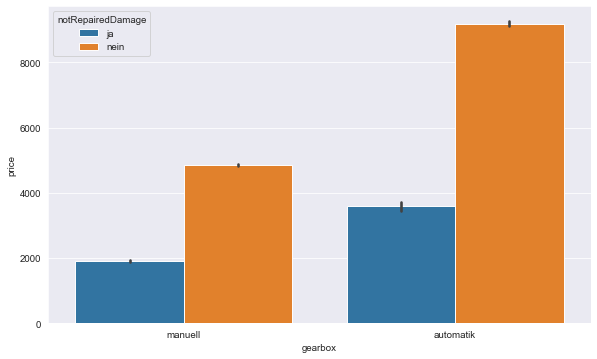

In [68]:
sns.barplot(x=df['gearbox'], y=df['price'], hue=df['notRepairedDamage']);

- La existencia o no de daños sin reparar también es un elemento determinante en el precio del auto
- En relación al tipo de cambio se mantienene la tendencia ya observada de que en promedio los autos con cambio automatico valdrían el doble que los manuales.

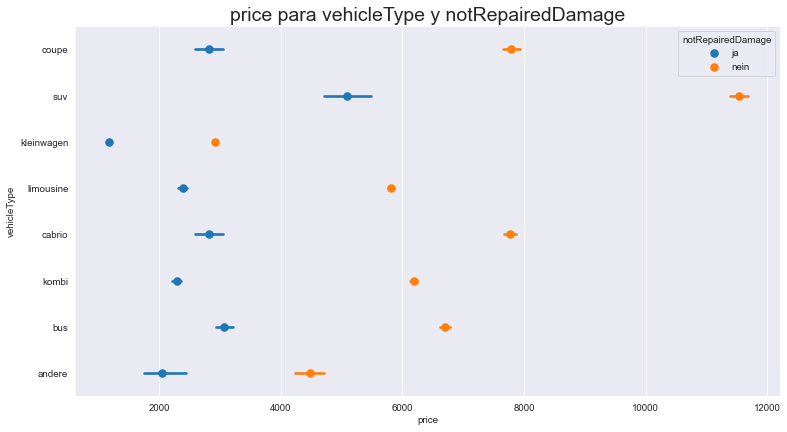

In [69]:
plt.figure(figsize=(13,7))
aux.pointplot_multivariado(df, 'price', 'vehicleType', 'notRepairedDamage')

- Vemos com o la existencia de daños sin reparar estaria provocando, en el caso de los compactos/kleinwagen, una variación de más de 2.000 euros, siendo esta la menor de todas
- El tipo de vehículo tiene un impacto tal que el precio de un compacto/kleinwagen con daños sin reparar en promedio es muy cercano al de un furgón o monovolumen/bus sin daños

Text(0.5, 1.0, 'Relación entre el año de registro y el precio en función de la existencia de daños en el vehículo sin reparar')

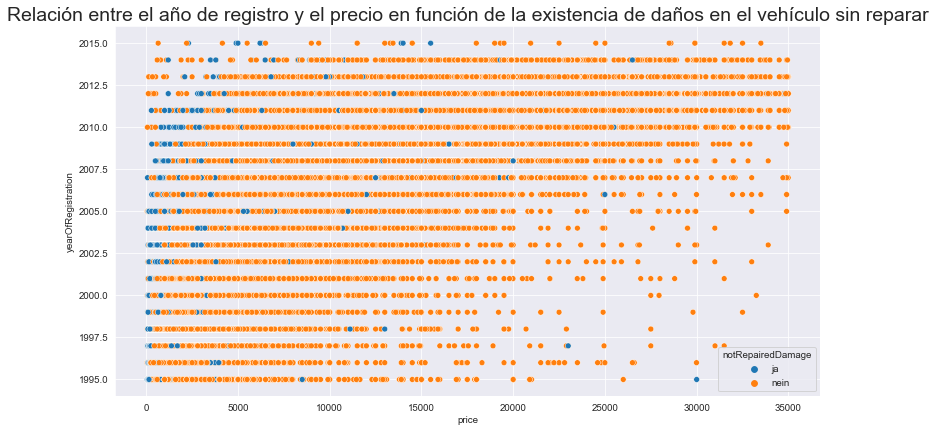

In [70]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=df, x = 'price', y = 'yearOfRegistration', hue='notRepairedDamage');
plt.title('Relación entre el año de registro y el precio en función de la existencia de daños en el vehículo sin reparar')

- En este gráfico se observa la tendencia hacia la relación lineal entre el año de registro y el precio
- Vemos como los autos con daños sin reparar son en su mayoría recientes

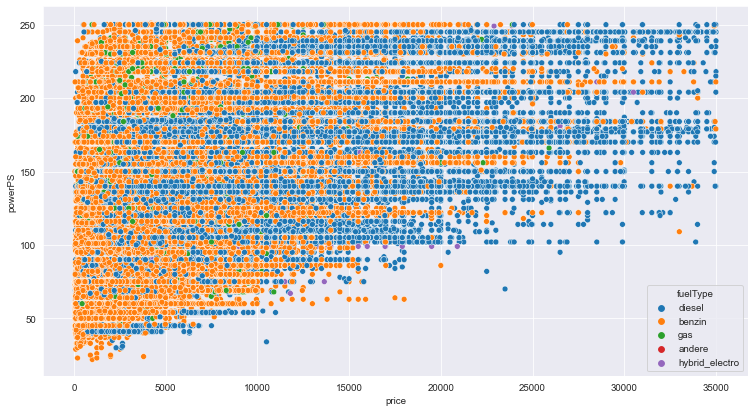

In [71]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=df, x = 'price', y = 'powerPS', hue='fuelType');

- En cuanto a la relación entre precio, potencia y tipo de combustible podríamos separar las observaciones en tres grupos:
    - Un primer grupo de autos con menos de 100 caballos y precios inferiores a 15.000 euros donde predomina la gasolina
    - A partir de los 100 caballos la gasolina sigue predominando para los vehículos más económicos mientras que su presencia para vehículos de precio más elevado se va intercalando con el diesel en pequeños sementos
    - Entre los 180 y los 250 caballos la gasolina aumenta su importancia y extiende su mayor presencia hasta los 10.000 euros mientras que en precios superiores se impone el diesel.

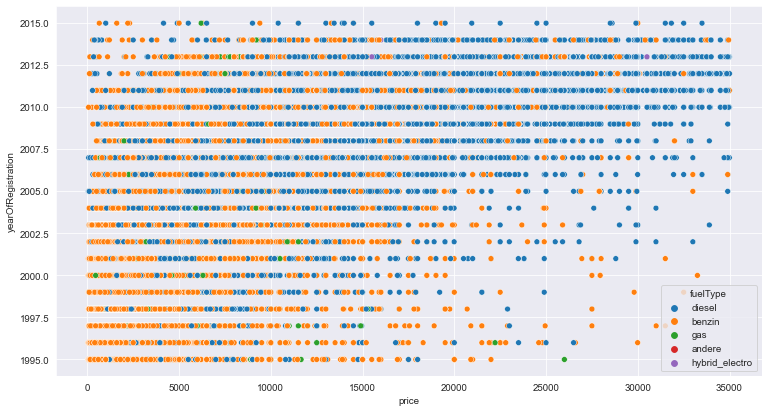

In [72]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=df, x = 'price', y = 'yearOfRegistration', hue='fuelType');

- La predominancia del diesel aumenta con los años, especialmente a partir de 2005 y se identifica con un mayor precio

## Otras transformaciones posteriores al análisis de los datos
- Eliminamos la variable `name` puesto que cumplió su utilidad para verificar la certeza de los registros y no la necesitamos para el modelamiento predictivo.

In [73]:
before_drop = df.shape[1]
df.drop(columns='name', inplace=True)
after_drop = df.shape[1]
print(f'Columnas eliminadas: {before_drop - after_drop}')

Columnas eliminadas: 1


## Dataset resultante

In [74]:
# Dimensiones del dataframe original
df_original.shape

(305762, 13)

In [75]:
# Dimensiones del dataframe procesado
df.shape

(249215, 10)

- El número de observaciones después de las transformaciones realizadas bajó de 305762 a 249215.
- Perdimos dos columnas: `name`, `cubic_centimeters` y `model`.
- Con la eliminación de esta última por su correlación con `powerPS` nos quitamos el problema de su elevado número de outliers.

## Exportación del dataset

In [76]:
df.to_csv('df_stage_2.csv', index = False)